# Inventario Forestal AGPRES

In [ ]:
!pip install pandas

In [1]:
import os
import glob
import pandas as pd

In [2]:
os.chdir(r"C:\Users\GEOMATICA\Curso_suelo\04_Inventario_Forestal\Datos\Tabla")

In [3]:
lista = glob.glob("*_Inventario.csv")
lista

['Datos_Inventario.csv', 'distribucion_inventario.csv']

In [4]:
AH_data = pd.read_csv(lista[0], delimiter=";")

In [8]:
AH_data.head(3)

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C
0,1,494028.546,9023749.586,7.862236,8.23,4.24
1,2,494033.087,9023749.028,4.647313,5.67,3.79
2,3,494042.399,9023748.940,5.634072,6.94,2.70


In [9]:
len(AH_data)

161

## Eliminar datos sin valores

In [10]:
data_clean = AH_data.dropna()

In [11]:
len(data_clean)

160

## Tipo de datos de las columnas

In [12]:
#Para comprobar que se ha leído bien
data_clean.dtypes

Arbol         int64
Este        float64
Norte       float64
DAP_cm      float64
Altura_T    float64
Altura_C    float64
dtype: object

## Calcular el área basal (en metros cuadrados)

In [14]:
import numpy as np
import copy

In [15]:
data_inventario = copy.copy(data_clean)

In [16]:
data_inventario['Area_Basal_m2'] = round((data_inventario['DAP_cm'] / 100)*(data_inventario['DAP_cm'] / 100)* np.pi/4,4)

In [17]:
data_inventario.head()

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,Area_Basal_m2
0,1,494028.546,9023749.586,7.862236,8.23,4.24,0.0049
1,2,494033.087,9023749.028,4.647313,5.67,3.79,0.0017
2,3,494042.399,9023748.940,5.634072,6.94,2.70,0.0025
3,4,494047.100,9023749.095,6.970970,7.81,4.47,0.0038
4,5,494056.927,9023749.512,8.498854,9.77,5.05,0.0057


##  Determinar el volumen comercial

In [19]:
Coeficiente_forma = 0.496

In [20]:
data_inventario['Vol_Comerc_m3'] = round((data_inventario['Area_Basal_m2'])*(data_inventario['Altura_C'])* Coeficiente_forma, 4)

In [21]:
data_inventario.head()

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,Area_Basal_m2,Vol_Comerc_m3
0,1,494028.546,9023749.586,7.862236,8.23,4.24,0.0049,0.0103
1,2,494033.087,9023749.028,4.647313,5.67,3.79,0.0017,0.0032
2,3,494042.399,9023748.940,5.634072,6.94,2.70,0.0025,0.0033
3,4,494047.100,9023749.095,6.970970,7.81,4.47,0.0038,0.0084
4,5,494056.927,9023749.512,8.498854,9.77,5.05,0.0057,0.0143


##  Determinar el volumen total

In [22]:
data_inventario['Vol_Total_m3'] = round((data_inventario['Area_Basal_m2'])*(data_inventario['Altura_T'])* Coeficiente_forma, 4)

In [23]:
data_inventario.head()

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,Area_Basal_m2,Vol_Comerc_m3,Vol_Total_m3
0,1,494028.546,9023749.586,7.862236,8.23,4.24,0.0049,0.0103,0.0200
1,2,494033.087,9023749.028,4.647313,5.67,3.79,0.0017,0.0032,0.0048
2,3,494042.399,9023748.940,5.634072,6.94,2.70,0.0025,0.0033,0.0086
3,4,494047.100,9023749.095,6.970970,7.81,4.47,0.0038,0.0084,0.0147
4,5,494056.927,9023749.512,8.498854,9.77,5.05,0.0057,0.0143,0.0276


## Principales estadísticos

In [24]:
lista_columna = list(data_inventario.columns)
print(lista_columna)

['Arbol', 'Este', 'Norte', 'DAP_cm', 'Altura_T', 'Altura_C', 'Area_Basal_m2', 'Vol_Comerc_m3', 'Vol_Total_m3']


In [25]:
lista_columna[3:8]

['DAP_cm', 'Altura_T', 'Altura_C', 'Area_Basal_m2', 'Vol_Comerc_m3']

In [26]:
#Principales estadísticos
data_inventario[lista_columna[3:9]].describe()

,DAP_cm,Altura_T,Altura_C,Area_Basal_m2,Vol_Comerc_m3,Vol_Total_m3
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,10.558712,10.401312,5.205938,0.009556,0.027059,0.055651
std,3.198572,2.788527,1.572007,0.005421,0.019756,0.041936
min,4.329004,4.190000,2.160000,0.001500,0.001600,0.003100
25%,8.307869,8.635000,4.220000,0.005425,0.011275,0.024975
50%,10.472371,10.625000,5.115000,0.008650,0.022650,0.044600
75%,12.867647,12.452500,6.245000,0.013025,0.040500,0.079550
max,18.461930,16.220000,10.320000,0.026800,0.103400,0.197700


In [27]:
datos_evaluados = data_inventario[lista_columna[3:9]]

In [28]:
estadisticas_descriptivas = datos_evaluados.describe()

In [29]:
type(estadisticas_descriptivas)

pandas.core.frame.DataFrame

In [30]:
estadisticas_descriptivas.head(10)

,DAP_cm,Altura_T,Altura_C,Area_Basal_m2,Vol_Comerc_m3,Vol_Total_m3
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,10.558712,10.401312,5.205938,0.009556,0.027059,0.055651
std,3.198572,2.788527,1.572007,0.005421,0.019756,0.041936
min,4.329004,4.190000,2.160000,0.001500,0.001600,0.003100
25%,8.307869,8.635000,4.220000,0.005425,0.011275,0.024975
50%,10.472371,10.625000,5.115000,0.008650,0.022650,0.044600
75%,12.867647,12.452500,6.245000,0.013025,0.040500,0.079550
max,18.461930,16.220000,10.320000,0.026800,0.103400,0.197700


In [53]:
dap_mean = round((list(estadisticas_descriptivas["DAP_cm"]))[1]/8,4)
Altura_C_mean = round((list(estadisticas_descriptivas["Altura_C"]))[1]/8,4)
Altura_T_mean = round((list(estadisticas_descriptivas["Altura_T"]))[1]/8,4)
#Vol_Comerc_m3_mean = (list(estadisticas_descriptivas["Vol_Comerc_m3"]))[1]/8
#Vol_Total_m3_mean = (list(estadisticas_descriptivas["Vol_Total_m3"]))[1]/8
#Vol_Total_m3_mean

In [31]:
estadisticas_descriptivas.to_csv('Estadisticas_descriptivas.csv', index=True)

In [31]:
# Suma a lo largo de las filas (eje 0)
suma_filas = datos_evaluados.sum(axis=0) 

In [32]:
suma_filas.head(7)

DAP_cm           1689.393939
Altura_T         1664.210000
Altura_C          832.950000
Area_Basal_m2       1.528900
Vol_Comerc_m3       4.329500
Vol_Total_m3        8.904100
dtype: float64

In [33]:
suma_filas.to_csv('Sumas_totales.csv', index=True)

## Determinar Distribución de frecuencia

In [34]:
intervalos = [2, 7, 12, 17, 22, 27, 32]

In [35]:
# Utiliza pd.cut() para dividir los diámetros en intervalos y contar cuántos caen en cada intervalo
distribucion_frecuencia = pd.cut(data_inventario['DAP_cm'], bins=intervalos, include_lowest=True)

In [36]:
# Calcula la frecuencia absoluta y relativa
frecuencia_absoluta = distribucion_frecuencia.value_counts().sort_index()
frecuencia_relativa = distribucion_frecuencia.value_counts(normalize=True).sort_index()

In [37]:
# Calcula la marca de clase (punto medio de cada intervalo)
marca_de_clase = [(i.left + i.right) / 2 for i in frecuencia_absoluta.index]

In [38]:
# Combina los resultados en un DataFrame
distribucion_df = pd.DataFrame({
    'Intervalo': frecuencia_absoluta.index,
    'Marca de Clase': marca_de_clase,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa': frecuencia_relativa.values
})

In [39]:
# Muestra la distribución de frecuencia cuantitativa con absoluta y relativa
print("Distribución de frecuencia del diámetro en cm:")
distribucion_df.head()

Distribución de frecuencia del diámetro en cm:


,Intervalo,Marca de Clase,Frecuencia Absoluta,Frecuencia Relativa
0,"(1.999, 7.0]",4.4995,22,0.1375
1,"(7.0, 12.0]",9.5000,84,0.5250
2,"(12.0, 17.0]",14.5000,50,0.3125
3,"(17.0, 22.0]",19.5000,4,0.0250
4,"(22.0, 27.0]",24.5000,0,0.0000


In [40]:
type(distribucion_df)

pandas.core.frame.DataFrame

In [41]:
distribucion_inventario = copy.copy(distribucion_df)

In [42]:
distribucion_inventario.head()

,Intervalo,Marca de Clase,Frecuencia Absoluta,Frecuencia Relativa
0,"(1.999, 7.0]",4.4995,22,0.1375
1,"(7.0, 12.0]",9.5000,84,0.5250
2,"(12.0, 17.0]",14.5000,50,0.3125
3,"(17.0, 22.0]",19.5000,4,0.0250
4,"(22.0, 27.0]",24.5000,0,0.0000


In [43]:
import math

In [44]:
distribucion_inventario['N_Ha'] = ((distribucion_inventario['Frecuencia Absoluta'])*1/0.62).apply(math.ceil)

In [45]:
distribucion_inventario.head()

,Intervalo,Marca de Clase,Frecuencia Absoluta,Frecuencia Relativa,N_Ha
0,"(1.999, 7.0]",4.4995,22,0.1375,36
1,"(7.0, 12.0]",9.5000,84,0.5250,136
2,"(12.0, 17.0]",14.5000,50,0.3125,81
3,"(17.0, 22.0]",19.5000,4,0.0250,7
4,"(22.0, 27.0]",24.5000,0,0.0000,0


In [46]:
import matplotlib.pyplot as plt

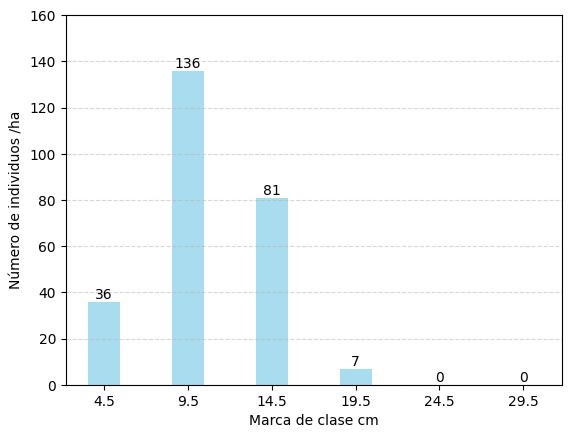

In [47]:
# Graficar los datos
plt.bar(distribucion_inventario["Marca de Clase"], distribucion_inventario["N_Ha"], 
        width=1.9, align='center', alpha=0.7,color='skyblue')
plt.xlabel('Marca de clase cm')
plt.ylabel('Número de individuos /ha')
#plt.title('Gráfico de Barras: Marca de Clase vs Número de Individuos /Ha')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas de valor en las barras
for x, y in zip(distribucion_inventario["Marca de Clase"], distribucion_inventario["N_Ha"]):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Establecer límite máximo en el eje y
plt.ylim(0, 160)  # Ajusta el límite máximo según tus necesidades

# Establecer las etiquetas del eje x como marcas de clase
plt.xticks(distribucion_inventario["Marca de Clase"])

# Guardar el gráfico como un archivo PNG
plt.savefig('grafico_barras.png')
plt.show()


In [48]:

distribucion_inventario.to_csv('distribucion_inventario.csv', index=True)

## Regresión Lineal con datos inventario

In [49]:
#pip install -U scikit-learn

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [51]:
datos_evaluados.head()

,DAP_cm,Altura_T,Altura_C,Area_Basal_m2,Vol_Comerc_m3,Vol_Total_m3
0,7.862236,8.23,4.24,0.0049,0.0103,0.0200
1,4.647313,5.67,3.79,0.0017,0.0032,0.0048
2,5.634072,6.94,2.70,0.0025,0.0033,0.0086
3,6.970970,7.81,4.47,0.0038,0.0084,0.0147
4,8.498854,9.77,5.05,0.0057,0.0143,0.0276


In [52]:
# Separar las características (X) y la variable objetivo (y)
X = datos_evaluados[['Area_Basal_m2']]
y = datos_evaluados['Vol_Comerc_m3']

In [53]:
# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

In [54]:
# Ajustar el modelo a los datos
modelo.fit(X, y)

LinearRegression()

In [55]:
# Obtener los coeficientes de la regresión
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

In [56]:
# Crear la ecuación de la regresión lineal
ecuacion = f"Volumen_Comercial_m3 = {pendiente:.2f} * Area_Basal_m2 + {intercepto:.2f}"
print("Ecuación de la regresión lineal:", ecuacion)

Ecuación de la regresión lineal: Volumen_Comercial_m3 = 3.37 * Area_Basal_m2 + -0.01


In [58]:
# Preparar los puntos para la línea de regresión
x_linea_regresion = np.linspace(X.min(), X.max(), 100)

In [ ]:
# Predecir los valores de y utilizando el modelo
y_linea_regresion = modelo.predict(X)

In [61]:
y_linea_regresion = pendiente * x_linea_regresion + intercepto

In [78]:
# Predecir los valores de y utilizando el modelo
y_pred = modelo.predict(X)

In [79]:
# Calcular el coeficiente de determinación R^2
r2 = r2_score(y, y_pred)
print("Coeficiente de determinación R^2:", r2)

Coeficiente de determinación R^2: 0.8558945710524575


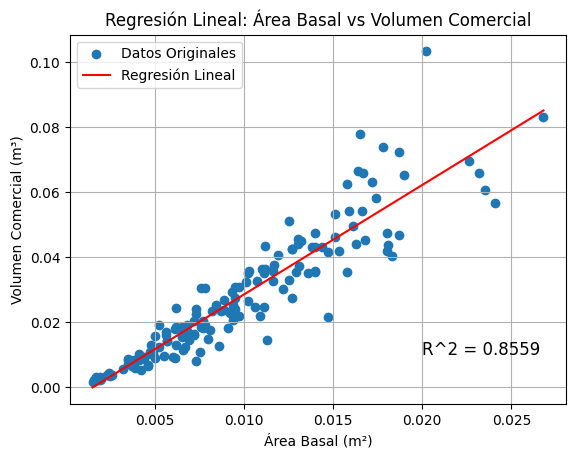

In [88]:
# Graficar los datos originales
plt.scatter(X, y, label='Datos Originales')
# Graficar la línea de regresión lineal
plt.plot(x_linea_regresion, y_linea_regresion, color='red', label='Regresión Lineal')
plt.xlabel('Área Basal (m²)')
plt.ylabel('Volumen Comercial (m³)')
plt.title('Regresión Lineal: Área Basal vs Volumen Comercial')

# Agregar el valor de R^2 en el gráfico
plt.text(0.02, 0.01, f'R^2 = {r2:.4f}', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

## Determinar la mejor regresión con R2 con AB y Volumen Comercial

In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [90]:
datos_evaluados.head()

,DAP_cm,Altura_T,Altura_C,Area_Basal_m2,Vol_Comerc_m3,Vol_Total_m3
0,7.862236,8.23,4.24,0.0049,0.0103,0.0200
1,4.647313,5.67,3.79,0.0017,0.0032,0.0048
2,5.634072,6.94,2.70,0.0025,0.0033,0.0086
3,6.970970,7.81,4.47,0.0038,0.0084,0.0147
4,8.498854,9.77,5.05,0.0057,0.0143,0.0276


In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = datos_evaluados[['Area_Basal_m2']]
y = datos_evaluados['Vol_Comerc_m3']

### Regresión lineal

In [91]:
# Regresión Lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)
y_pred_lineal = modelo_lineal.predict(X)
r2_lineal = r2_score(y, y_pred_lineal)

### Regresión Logarítmica

In [92]:
# Regresión Logarítmica
def func_log(x, a, b):
    return a * np.log(x) + b

In [93]:
params_log, cov_log = curve_fit(func_log, X.values.flatten(), y.values.flatten())
y_pred_log = func_log(X.values.flatten(), *params_log)
r2_log = r2_score(y, y_pred_log)

### Regresión Polinómica

In [94]:
# Regresión Polinómica
coeffs_polinom, _ = np.polyfit(X.values.flatten(), y.values.flatten(), 2, cov=True)
y_pred_polinom = np.polyval(coeffs_polinom, X.values.flatten())
r2_polinom = r2_score(y, y_pred_polinom)

### Regresión Potencial

In [96]:
# Regresión Potencial
def func_pot(x, a, b):
    return a * np.power(x, b)

In [97]:
params_pot, cov_pot = curve_fit(func_pot, X.values.flatten(), y.values.flatten())
y_pred_pot = func_pot(X.values.flatten(), *params_pot)
r2_pot = r2_score(y, y_pred_pot)

### Regresión Exponencial

In [98]:
# Regresión Exponencial
def func_exp(x, a, b):
    return a * np.exp(b * x)

In [99]:
params_exp, cov_exp = curve_fit(func_exp, X.values.flatten(), y.values.flatten())
y_pred_exp = func_exp(X.values.flatten(), *params_exp)
r2_exp = r2_score(y, y_pred_exp)

In [100]:
# Seleccionar el mejor ajuste (el que tenga el mayor R2 cercano a 1)
mejor_ajuste = max([(r2_lineal, 'Lineal'), (r2_log, 'Logarítmica'), (r2_polinom, 'Polinómica'),
                    (r2_pot, 'Potencial'), (r2_exp, 'Exponencial')])

In [103]:
print("Mejor ajuste:", mejor_ajuste[1], ", valor R2:", round(mejor_ajuste[0],3))

Mejor ajuste: Polinómica , valor R2: 0.856


### Graficar los datos

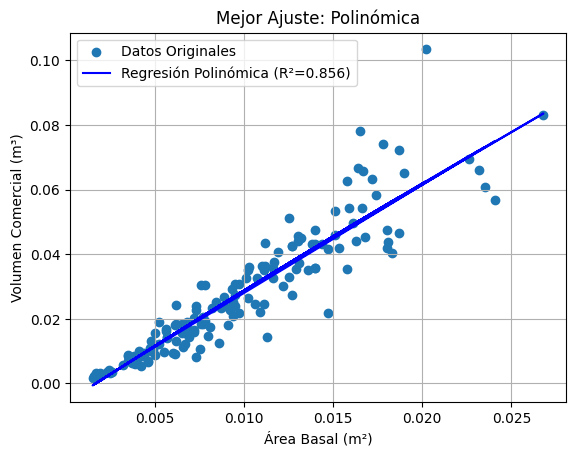

In [105]:
# Graficar los datos y la mejor línea de ajuste
plt.scatter(X, y, label='Datos Originales')
if mejor_ajuste[1] == 'Lineal':
    plt.plot(X, y_pred_lineal, color='red', label=f'Regresión Lineal (R²={r2_lineal:.3f})')
elif mejor_ajuste[1] == 'Logarítmica':
    plt.plot(X, y_pred_log, color='green', label=f'Regresión Logarítmica (R²={r2_log:.3f})')
elif mejor_ajuste[1] == 'Polinómica':
    plt.plot(X, y_pred_polinom, color='blue', label=f'Regresión Polinómica (R²={r2_polinom:.3f})')
elif mejor_ajuste[1] == 'Potencial':
    plt.plot(X, y_pred_pot, color='orange', label=f'Regresión Potencial (R²={r2_pot:.3f})')
elif mejor_ajuste[1] == 'Exponencial':
    plt.plot(X, y_pred_exp, color='purple', label=f'Regresión Exponencial (R²={r2_exp:.3f})')

plt.xlabel('Área Basal (m²)')
plt.ylabel('Volumen Comercial (m³)')
plt.title('Mejor Ajuste: ' + mejor_ajuste[1])
plt.legend()
plt.grid(True)
plt.show()

## Determinar la mejor regresión con R2 con DAP cm y Volumen Comercial

In [106]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [107]:
datos_evaluados.head()

,DAP_cm,Altura_T,Altura_C,Area_Basal_m2,Vol_Comerc_m3,Vol_Total_m3
0,7.862236,8.23,4.24,0.0049,0.0103,0.0200
1,4.647313,5.67,3.79,0.0017,0.0032,0.0048
2,5.634072,6.94,2.70,0.0025,0.0033,0.0086
3,6.970970,7.81,4.47,0.0038,0.0084,0.0147
4,8.498854,9.77,5.05,0.0057,0.0143,0.0276


In [108]:
# Separar las características (X) y la variable objetivo (y)
X = datos_evaluados[['DAP_cm']]
y = datos_evaluados['Vol_Comerc_m3']

### Regresión lineal

In [109]:
# Regresión Lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)
y_pred_lineal = modelo_lineal.predict(X)
r2_lineal = r2_score(y, y_pred_lineal)

### Regresión Logarítmica

In [110]:
# Regresión Logarítmica
def func_log(x, a, b):
    return a * np.log(x) + b

In [111]:
params_log, cov_log = curve_fit(func_log, X.values.flatten(), y.values.flatten())
y_pred_log = func_log(X.values.flatten(), *params_log)
r2_log = r2_score(y, y_pred_log)

### Regresión Polinómica

In [112]:
# Regresión Polinómica
coeffs_polinom, _ = np.polyfit(X.values.flatten(), y.values.flatten(), 2, cov=True)
y_pred_polinom = np.polyval(coeffs_polinom, X.values.flatten())
r2_polinom = r2_score(y, y_pred_polinom)

### Regresión Potencial

In [113]:
# Regresión Potencial
def func_pot(x, a, b):
    return a * np.power(x, b)

In [114]:
params_pot, cov_pot = curve_fit(func_pot, X.values.flatten(), y.values.flatten())
y_pred_pot = func_pot(X.values.flatten(), *params_pot)
r2_pot = r2_score(y, y_pred_pot)

### Regresión Exponencial

In [115]:
# Regresión Exponencial
def func_exp(x, a, b):
    return a * np.exp(b * x)

In [116]:
params_exp, cov_exp = curve_fit(func_exp, X.values.flatten(), y.values.flatten())
y_pred_exp = func_exp(X.values.flatten(), *params_exp)
r2_exp = r2_score(y, y_pred_exp)

In [117]:
# Seleccionar el mejor ajuste (el que tenga el mayor R2 cercano a 1)
mejor_ajuste = max([(r2_lineal, 'Lineal'), (r2_log, 'Logarítmica'), (r2_polinom, 'Polinómica'),
                    (r2_pot, 'Potencial'), (r2_exp, 'Exponencial')])

In [118]:
print("Mejor ajuste:", mejor_ajuste[1], ", valor R2:", round(mejor_ajuste[0],3))

Mejor ajuste: Polinómica , valor R2: 0.856


In [121]:
ecuacion_lineal = f"Volumen_Comercial = {modelo_lineal.coef_[0]:.2f} * Area_Basal_m2 + {modelo_lineal.intercept_:.2f}"
print("Fórmula del Mejor Ajuste (Regresión Lineal):", ecuacion_lineal)

Fórmula del Mejor Ajuste (Regresión): Volumen_Comercial = 0.01 * Area_Basal_m2 + -0.03


In [128]:
# Regresión Logarítmica
if mejor_ajuste[1] == 'Logarítmica':
    a_log, b_log = params_log
    ecuacion_log = f"Volumen_Comercial = {a_log:.5f} * ln(Area_Basal_m2) + {b_log:.5f}"
    print("Fórmula del Mejor Ajuste (Regresión Logarítmica):", ecuacion_log)

# Regresión Lineal
elif mejor_ajuste[1] == 'Lineal':
    ecuacion_lineal = f"Volumen_Comercial = {modelo_lineal.coef_[0]:.5f} * Area_Basal_m2 + {modelo_lineal.intercept_:.5f}"
    print("Fórmula del Mejor Ajuste (Regresión Lineal):", ecuacion_lineal)

# Regresión Polinómica
elif mejor_ajuste[1] == 'Polinómica':
    a_polinom, b_polinom, c_polinom = coeffs_polinom
    ecuacion_polinom = f"Volumen_Comercial = {a_polinom:.5f} * Area_Basal_m2^2 + {b_polinom:.5f} * Area_Basal_m2 + {c_polinom:.5f}"
    print("Fórmula del Mejor Ajuste (Regresión Polinómica):", ecuacion_polinom)
# Regresión Potencial
elif mejor_ajuste[1] == 'Potencial':
    a_pot, b_pot = params_pot
    ecuacion_pot = f"Volumen_Comercial = {a_pot:.5f} * Area_Basal_m2^{b_pot:.5f}"
    print("Fórmula del Mejor Ajuste (Regresión Potencial):", ecuacion_pot)
# Regresión Exponencial
elif mejor_ajuste[1] == 'Exponencial':
    a_exp, b_exp = params_exp
    ecuacion_exp = f"Volumen_Comercial = {a_exp:.5f} * e^({b_exp:.5f} * Area_Basal_m2)"
    print("Fórmula del Mejor Ajuste (Regresión Exponencial):", ecuacion_exp)

Fórmula del Mejor Ajuste (Regresión Polinómica): Volumen_Comercial = 0.00028 * Area_Basal_m2^2 + -0.00039 * Area_Basal_m2 + -0.00317


### Graficar los datos

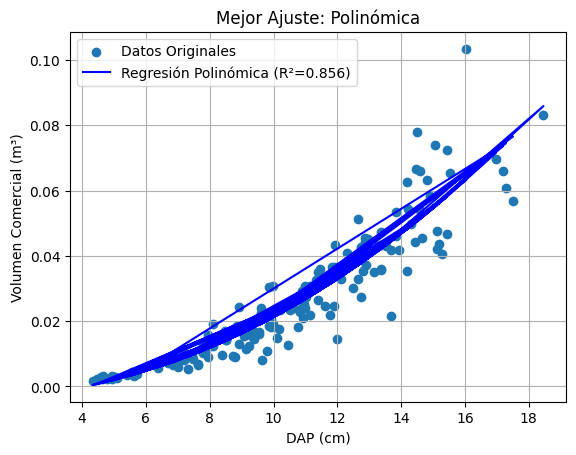

In [129]:
# Graficar los datos y la mejor línea de ajuste
plt.scatter(X, y, label='Datos Originales')
if mejor_ajuste[1] == 'Lineal':
    plt.plot(X, y_pred_lineal, color='red', label=f'Regresión Lineal (R²={r2_lineal:.3f})')
elif mejor_ajuste[1] == 'Logarítmica':
    plt.plot(X, y_pred_log, color='green', label=f'Regresión Logarítmica (R²={r2_log:.3f})')
elif mejor_ajuste[1] == 'Polinómica':
    plt.plot(X, y_pred_polinom, color='blue', label=f'Regresión Polinómica (R²={r2_polinom:.3f})')
elif mejor_ajuste[1] == 'Potencial':
    plt.plot(X, y_pred_pot, color='orange', label=f'Regresión Potencial (R²={r2_pot:.3f})')
elif mejor_ajuste[1] == 'Exponencial':
    plt.plot(X, y_pred_exp, color='purple', label=f'Regresión Exponencial (R²={r2_exp:.3f})')

plt.xlabel('DAP (cm)')
plt.ylabel('Volumen Comercial (m³)')
plt.title('Mejor Ajuste: ' + mejor_ajuste[1])
plt.legend()
plt.grid(True)
plt.show()